<a href="https://colab.research.google.com/github/nicktheslumpgod/CuseHacksDatathon2025/blob/main/SYRCityline_Simple_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#Generated with ChatGPT o3-mini-high
# Load the data
df = pd.read_csv("/content/SYRCityline_Requests_(2021-Present)_Cleaned.csv")

# Convert the 'Closed_at_local' column to datetime
df['Closed_at_local'] = pd.to_datetime(df['Closed_at_local'])

# Sort the DataFrame by the closed date
df = df.sort_values('Closed_at_local')

# Group by date (ignoring time) and count tickets per day
daily_counts = df.groupby(df['Closed_at_local'].dt.date).size().reset_index(name='tickets')
# Rename the date column and convert it back to datetime for plotting
daily_counts.rename(columns={'Closed_at_local': 'date'}, inplace=True)
daily_counts['date'] = pd.to_datetime(daily_counts['date']) # Changed this line


# Alternatively, you can do:
# daily_counts = df.groupby(df['Closed_at_local'].dt.date).size().reset_index(name='tickets')
# daily_counts['date'] = pd.to_datetime(daily_counts['Closed_at_local'])

# Calculate the cumulative sum of tickets issued over time
daily_counts['cumulative_tickets'] = daily_counts['tickets'].cumsum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['date'], daily_counts['cumulative_tickets'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Cumulative Tickets Issued')
plt.title('Cumulative Tickets Issued 2021-05 through Present')
plt.grid(True)

# Format the x-axis to show monthly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-7-e49cff33fcb4>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed_at_local'] = pd.to_datetime(df['Closed_at_local'])


<ipython-input-6-c598b2ad063a>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed_at_local'] = pd.to_datetime(df['Closed_at_local'])


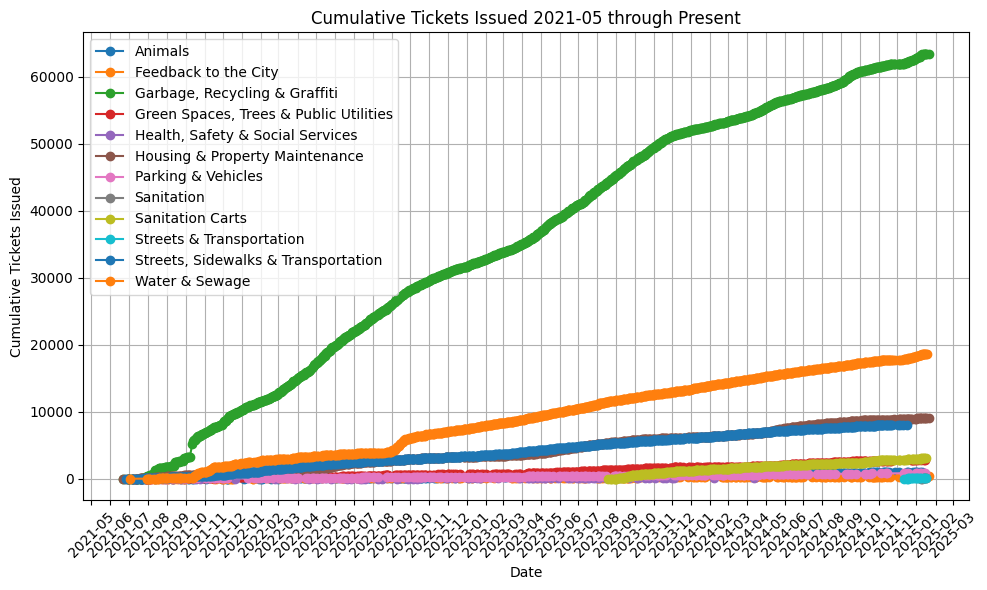

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_csv("/content/SYRCityline_Requests_(2021-Present)_Cleaned.csv")

# Convert the 'Closed_at_local' column to datetime
df['Closed_at_local'] = pd.to_datetime(df['Closed_at_local'])

# Sort by date (and optionally by agency to keep records in a predictable order)
df = df.sort_values(['Agency_Name', 'Closed_at_local'])

# Group by Agency_Name and date, counting tickets per day per agency
grouped = df.groupby(
    ['Agency_Name', df['Closed_at_local'].dt.date]
).size().reset_index(name='tickets')

# Rename the date column for clarity
grouped.rename(columns={'Closed_at_local': 'date'}, inplace=True)

# Convert the date back to datetime for plotting
grouped['date'] = pd.to_datetime(grouped['date'])

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each agency's cumulative line
for agency, subdf in grouped.groupby('Agency_Name'):
    # Ensure the subset is sorted by date
    subdf = subdf.sort_values('date')
    # Compute the cumulative tickets for this agency
    subdf['cumulative_tickets'] = subdf['tickets'].cumsum()

    # Plot this agency's data
    plt.plot(
        subdf['date'],
        subdf['cumulative_tickets'],
        marker='o',
        linestyle='-',
        label=agency
    )

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Tickets Issued')
plt.title('Cumulative Tickets Issued 2021-05 through Present')
plt.grid(True)

# Format the x-axis to show monthly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add a legend so each agency line is identified
plt.legend()

plt.tight_layout()
plt.show()
